In [12]:
import sys
import pandas as pd

In [ ]:
user = pd.read_csv('/content/drive/MyDrive/Rumor Detection/new Dataset/train/user (1).csv')
db = pd.read_csv('/content/drive/MyDrive/Rumor Detection/new Dataset/train/tweet (1).csv')

FileNotFoundError: ignored

In [ ]:
user_1 = pd.read_csv('/content/drive/MyDrive/Rumor Detection/Dataset/train/user (1).csv')
tweet_1 = pd.read_csv('/content/drive/MyDrive/Rumor Detection/Dataset/train/tweet (1).csv')

In [ ]:
tweet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweetId                 5877 non-null   int64  
 1   text                    5877 non-null   object 
 2   source                  5877 non-null   object 
 3   created_at              5877 non-null   object 
 4   is_reply                20 non-null     float64
 5   retweet_count           5877 non-null   int64  
 6   favorite_count          5877 non-null   int64  
 7   is_quote_status         5877 non-null   bool   
 8   entities_symbols        5877 non-null   object 
 9   n_symbols               5877 non-null   int64  
 10  entities_user_mentions  5877 non-null   object 
 11  n_user_mentions         5877 non-null   int64  
 12  entities_hashtags       5877 non-null   object 
 13  n_hashtags              5877 non-null   int64  
 14  entities_url            5877 non-null   

In [ ]:
user_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   userId                        5877 non-null   int64 
 1   name                          5877 non-null   object
 2   screen_name                   5877 non-null   object
 3   tweetId                       5877 non-null   int64 
 4   verfifed                      5877 non-null   bool  
 5   followers_count               5877 non-null   int64 
 6   statuses_count                5877 non-null   int64 
 7   friends_count                 5877 non-null   int64 
 8   favourites_count              5877 non-null   int64 
 9   listed_count                  5877 non-null   int64 
 10  location                      4863 non-null   object
 11  created_at                    5877 non-null   object
 12  profile_image_url             5877 non-null   object
 13  profile_background

In [ ]:
user_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   userId                        5877 non-null   int64 
 1   name                          5877 non-null   object
 2   screen_name                   5877 non-null   object
 3   tweetId                       5877 non-null   int64 
 4   verfifed                      5877 non-null   bool  
 5   followers_count               5877 non-null   int64 
 6   statuses_count                5877 non-null   int64 
 7   friends_count                 5877 non-null   int64 
 8   favourites_count              5877 non-null   int64 
 9   listed_count                  5877 non-null   int64 
 10  location                      4863 non-null   object
 11  created_at                    5877 non-null   object
 12  profile_image_url             5877 non-null   object
 13  profile_background

In [ ]:
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
stop_list = stopwords.words('english')
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import os, re, csv, math, codecs


# For Training
import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
#from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

# For array, dataset, and visualizing
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import STOPWORDS,WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata


from keras.preprocessing import text,sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
db.head()

,tweetId,text,source,created_at,is_reply,retweet_count,favorite_count,is_quote_status,entities_symbols,n_symbols,entities_user_mentions,n_user_mentions,entities_hashtags,n_hashtags,entities_url,n_url,label
0,552790074166108160,Ten dead in shooting at Paris offices of satir...,SocialFlow,2015-01-07 11:33:18,NaN,231,24,False,[],0,[],0,[],0,['http://trib.al/6smRXz6'],1,true
1,723198441690636288,Pop legend Prince has died at 57: https://t.co...,SocialFlow,2016-04-21 17:15:19,NaN,1145,908,False,[],0,[],0,[],0,['http://eonli.ne/22QP2KW'],1,non-rumor
2,547803254516490240,"Will you be able to float on Jan. 4, 2015, aka...",Tweetbot for Mac,2014-12-24 17:17:28,NaN,115,84,False,[],0,[],0,[],0,['http://www.slate.com/blogs/bad_astronomy/201...,1,false
3,553584292090359808,"Gunfire, explosions heard at print plant north...",TweetDeck,2015-01-09 16:09:14,NaN,117,53,False,[],0,[],0,"[{'text': 'CharlieHebdo', 'indices': [68, 81]}]",1,['http://bit.ly/14A14AX'],1,non-rumor
4,514057033419849728,"Alaskan reporter says ""f*ck this,"" quits on li...",Sprinklr,2014-09-22 14:22:02,NaN,149,211,False,[],0,[],0,[],0,['http://cosm.ag/6013oSCV'],1,true


In [ ]:
db['label']=db['label'].replace(['unverified'],True)
db['label']=db['label'].replace(['non-rumor'],False)
db['label']=db['label'].replace(['true'],True)
db['label']=db['label'].replace(['false'],True)

In [ ]:
data=[db['text'],db['text'].apply(len),db['label']]
headers=["text","length","target"]
text_df=pd.concat(data,axis=1,keys=headers)

In [ ]:
text_df.head()

,text,length,target
0,Ten dead in shooting at Paris offices of satir...,111,True
1,Pop legend Prince has died at 57: https://t.co...,81,False
2,"Will you be able to float on Jan. 4, 2015, aka...",117,True
3,"Gunfire, explosions heard at print plant north...",140,False
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,True


In [ ]:
text_df['target']=text_df['target'].astype(int)

In [ ]:
text_df.head()

,text,length,target
0,Ten dead in shooting at Paris offices of satir...,111,1
1,Pop legend Prince has died at 57: https://t.co...,81,0
2,"Will you be able to float on Jan. 4, 2015, aka...",117,1
3,"Gunfire, explosions heard at print plant north...",140,0
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,1


In [ ]:
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p

In [ ]:
p.set_options(p.OPT.URL
,p.OPT.MENTION
,p.OPT.HASHTAG
,p.OPT.RESERVED
,p.OPT.EMOJI
,p.OPT.SMILEY
,p.OPT.NUMBER)

In [ ]:
p.tokenize('Rakshith is a good boy R# #Rakshith @alahamrakshith')

'Rakshith is a good boy R$HASHTAG$ $HASHTAG$ $MENTION$'

In [ ]:
p.clean('Rakshith is a good boy R# #Rakshith @alahamrakshith')

'Rakshith is a good boy R'

In [ ]:
text_df['clean_tweet']=''

In [ ]:
text_df.head()

,text,length,target,clean_tweet
0,Ten dead in shooting at Paris offices of satir...,111,1,
1,Pop legend Prince has died at 57: https://t.co...,81,0,
2,"Will you be able to float on Jan. 4, 2015, aka...",117,1,
3,"Gunfire, explosions heard at print plant north...",140,0,
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,1,


In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "f*ck" : "fuck",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
  
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

def remove_pattern(input_txt,pattern):
  r = re.findall(pattern,input_txt)
  for i in r:
    input_txt = re.sub(i,'',input_txt)
  return input_txt



In [ ]:
text_df.head()

,text,length,target,clean_tweet
0,Ten dead in shooting at Paris offices of satir...,111,1,
1,Pop legend Prince has died at 57: https://t.co...,81,0,
2,"Will you be able to float on Jan. 4, 2015, aka...",117,1,
3,"Gunfire, explosions heard at print plant north...",140,0,
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,1,


In [ ]:
temp_text = " i am https://www.google.com/ meh #Good_one"

In [ ]:
p.set_options(p.OPT.URL
,p.OPT.RESERVED
,p.OPT.EMOJI
,p.OPT.SMILEY
,p.OPT.NUMBER)

In [ ]:
p.clean(temp_text)

'i am meh #Good_one'

In [ ]:
#removing link, reserved word, emoji,smiley,number

p.set_options(p.OPT.URL
,p.OPT.RESERVED
,p.OPT.EMOJI
,p.OPT.SMILEY
,p.OPT.NUMBER)

for index,row in text_df.iterrows():
  text_df['clean_tweet'][index] = p.clean(text_df['text'][index])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
text_df

,text,length,target,clean_tweet
0,Ten dead in shooting at Paris offices of satir...,111,1,Ten dead in shooting at Paris offices of satir...
1,Pop legend Prince has died at 57: https://t.co...,81,0,Pop legend Prince has died at :
2,"Will you be able to float on Jan. 4, 2015, aka...",117,1,"Will you be able to float on Jan. , , aka Zero..."
3,"Gunfire, explosions heard at print plant north...",140,0,"Gunfire, explosions heard at print plant north..."
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,1,"Alaskan reporter says ""f*ck this,"" quits on li..."
...,...,...,...,...
5872,#Breaking: Soldier killed at war memorial iden...,137,1,#Breaking: Soldier killed at war memorial iden...
5873,Statement from Ottawa Hospital: received 3 pat...,98,1,Statement from Ottawa Hospital: received patie...
5874,Corporations have sold or spun off $1.6 trilli...,143,1,Corporations have sold or spun off $1.6 trilli...
5875,Justice must be served! #Ferguson #MikeBrown,45,0,Justice must be served! #Ferguson #MikeBrown


In [ ]:
text_df['clean_tweet'][129]

'Waiting for the new episode of #TeenWolf like...'

In [ ]:
!pip install wordsegment

     |████████████████████████████████| 4.8MB 32.2MB/s 


In [ ]:
from wordsegment import load,segment

In [ ]:
temp_text = "Waiting I'd for the new episode of #TeenWolf like..."

In [ ]:
load()
temp_text = ' '.join(segment(temp_text))
temp_text

'waiting id for the new episode of teen wolf like'

In [ ]:
pip install --upgrade language-check

  Using cached https://files.pythonhosted.org/packages/97/45/0fd1d3683d6129f30fa09143fa383cdf6dff8bc0d1648f2cf156109cb772/language-check-1.1.tar.gz
  ERROR: Failed building wheel for language-check
  Running setup.py clean for language-check
Failed to build language-check
    Running setup.py install for language-check ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-vt4jkb9e/language-check/setup.py'"'"'; __file__='"'"'/tmp/pip-install-vt4jkb9e/language-check/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-2vcxmurk/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
!pip install contractions

     |████████████████████████████████| 327kB 26.2MB/s 
     |████████████████████████████████| 286kB 43.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85389 sha256=28842beea4143838f3d1c7be2dfd0b4e4e257736ce2d1e266e0dfcc59433e055
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
temp_text = "I'm waiting for riverdale. He'd be so excited."

In [ ]:
# Removing contractions

import contractions
for index,row in text_df.iterrows():
  expanded_words = []
  for word in text_df['clean_tweet'][index].split():
    expanded_words.append(contractions.fix(word))
  expanded_text = ' '.join(expanded_words)
  text_df['clean_tweet'][index]=expanded_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# Replace abbreviations

for index,row in text_df.iterrows():
  text_df['clean_tweet'][index] = replace_abbrev(text_df['clean_tweet'][index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# removing hashtags, mentions, splitting hashtags
load()
for index,row in text_df.iterrows():
  text_df['clean_tweet'][index] = ' '.join(segment(text_df['clean_tweet'][index]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
text_df['clean_tweet'][4]

'alaskan reporter says fck this quits on live tv in marijuana legalization protest'

In [ ]:
text_df['text'][4]

'Alaskan reporter says "f*ck this," quits on live TV in marijuana legalization protest: http://t.co/oymMD164jL http://t.co/ao5Ks0nJIM'

In [ ]:
text_df.head(30)

,text,length,target,clean_tweet
0,Ten dead in shooting at Paris offices of satir...,111,1,ten dead in shooting at paris offices of satir...
1,Pop legend Prince has died at 57: https://t.co...,81,0,pop legend prince has died at
2,"Will you be able to float on Jan. 4, 2015, aka...",117,1,will you be able to float on january aka zero ...
3,"Gunfire, explosions heard at print plant north...",140,0,gunfire explosions heard at print plant north ...
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,1,alaskan reporter says fck this quits on live t...
5,While the initial looting in #Ferguson was dep...,137,0,while the initial looting in ferguson was depl...
6,Maybe hard hitting @foxnews should be covering...,120,1,may be hard hitting foxnews should be covering...
7,Brilliant. #JeSuisCharlie via @lectrr http://t...,60,0,brilliant je suis charlie via lect rr
8,Updated: Canadian soldier killed in attack at ...,94,1,updated canadian soldier killed in attack at p...
9,Police marksmen take up position at scene of h...,123,0,police marksmen take up position at scene of h...


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
type(stop_words)

set

In [ ]:
stop_words.add('k')

In [ ]:
temp_text = "I am in the bedroom"

In [ ]:
temp_text = ' '.join([word for word in temp_text.split() if word not in (stop_words)])
temp_text

'I bedroom'

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own

In [ ]:
# removing stop words

for index,row in text_df.iterrows():
  text_df['clean_tweet'][index] = ' '.join([word for word in text_df['clean_tweet'][index].split() if word not in (stop_words)])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
text_df.head(20)

,text,length,target,clean_tweet
0,Ten dead in shooting at Paris offices of satir...,111,1,ten dead shooting paris offices satirical maga...
1,Pop legend Prince has died at 57: https://t.co...,81,0,pop legend prince died
2,"Will you be able to float on Jan. 4, 2015, aka...",117,1,able float january aka zero g day hint
3,"Gunfire, explosions heard at print plant north...",140,0,gunfire explosions heard print plant north par...
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,1,alaskan reporter says fck quits live tv mariju...
5,While the initial looting in #Ferguson was dep...,137,0,initial looting ferguson deplorable clear town...
6,Maybe hard hitting @foxnews should be covering...,120,1,may hard hitting foxnews covering going fergus...
7,Brilliant. #JeSuisCharlie via @lectrr http://t...,60,0,brilliant je suis charlie via lect rr
8,Updated: Canadian soldier killed in attack at ...,94,1,updated canadian soldier killed attack parliam...
9,Police marksmen take up position at scene of h...,123,0,police marksmen take position scene hostage si...


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(text_df['clean_tweet'],text_df['target'],random_state=42,test_size=0.2,stratify=text_df['target'],shuffle=True)

In [ ]:
raw_docs_train = X_train.tolist()
raw_docs_test = X_test.tolist()

In [ ]:
text_df['clean_len']=''

In [ ]:
text_df.head()

,text,length,target,clean_tweet,clean_len
0,Ten dead in shooting at Paris offices of satir...,111,1,ten dead shooting paris offices satirical maga...,
1,Pop legend Prince has died at 57: https://t.co...,81,0,pop legend prince died,
2,"Will you be able to float on Jan. 4, 2015, aka...",117,1,able float january aka zero g day hint,
3,"Gunfire, explosions heard at print plant north...",140,0,gunfire explosions heard print plant north par...,
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,1,alaskan reporter says fck quits live tv mariju...,


In [ ]:
text_df['clean_len']=text_df['clean_tweet'].apply(len)

In [ ]:
text_df.head()

,text,length,target,clean_tweet,clean_len
0,Ten dead in shooting at Paris offices of satir...,111,1,ten dead shooting paris offices satirical maga...,77
1,Pop legend Prince has died at 57: https://t.co...,81,0,pop legend prince died,22
2,"Will you be able to float on Jan. 4, 2015, aka...",117,1,able float january aka zero g day hint,38
3,"Gunfire, explosions heard at print plant north...",140,0,gunfire explosions heard print plant north par...,85
4,"Alaskan reporter says ""f*ck this,"" quits on li...",132,1,alaskan reporter says fck quits live tv mariju...,70


In [ ]:
max_seq_len = np.round(text_df['clean_len'].mean()+text_df['clean_len'].std()).astype(int)

In [ ]:
max_seq_len

93

In [ ]:
MAX_NB_WORDS=100000
embed_dim = 300

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(text_df['clean_tweet'])  #leaky
word_seq_train = tokenizer.texts_to_sequences(raw_docs_train)
word_seq_test = tokenizer.texts_to_sequences(raw_docs_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len)
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len)

dictionary size:  9081


In [ ]:
word_seq_train

array([[   0,    0,    0, ...,   59,    6,    8],
       [   0,    0,    0, ...,  369,    3,    7],
       [   0,    0,    0, ...,  173, 6005,   14],
       ...,
       [   0,    0,    0, ...,    0,    0,  273],
       [   0,    0,    0, ...,  225,   48, 7479],
       [   0,    0,    0, ...,   12,  295, 6580]], dtype=int32)

In [ ]:
%cd /content/drive/MyDrive/Minor_project/PWD

/content/drive/MyDrive/Minor_project/PWD


In [ ]:
embeddings_index={}
f= codecs.open('wiki-news-300d-1M.vec',encoding='utf-8')

for line in tqdm(f):
  values=line.rstrip().rsplit(' ')
  word=values[0]
  coefs=np.asarray(values[1:],dtype='float32')
  embeddings_index[word]=coefs
f.close()

print("Number of word vectors : %s"%len(embeddings_index))

999995it [01:27, 11408.79it/s]

Number of word vectors : 999995


In [ ]:

print('preparing embedding matrix...')

words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index)+1)
embedding_matrix = np.zeros((nb_words, embed_dim))

for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 771


In [ ]:
print("sample words not found: ", np.random.choice(words_not_found, 10))

sample words not found:  ['via9newsaus' 'viaafneil4u9525' 'charlo' 'u9525' 'creola' 'nathalie'
 'cabuwolinskicharbtignous' 'bti' 'dowtown' 'gtgtirssent46378040in']


In [ ]:

from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [ ]:
import tensorflow as tf

In [ ]:
model3 = tf.keras.Sequential([
      
      tf.keras.layers.Embedding(nb_words,embed_dim,input_length=max_seq_len, weights=[embedding_matrix],trainable=False),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(32,activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1,activation='sigmoid')
])
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 93, 300)           2724600   
_________________________________________________________________
dropout_14 (Dropout)         (None, 93, 300)           0         
_________________________________________________________________
bidirectional_35 (Bidirectio (None, 93, 128)           186880    
_________________________________________________________________
bidirectional_36 (Bidirectio (None, 93, 128)           98816     
_________________________________________________________________
bidirectional_37 (Bidirectio (None, 93, 128)           98816     
_________________________________________________________________
bidirectional_38 (Bidirectio (None, 93, 128)           98816     
_________________________________________________________________
bidirectional_39 (Bidirectio (None, 64)               

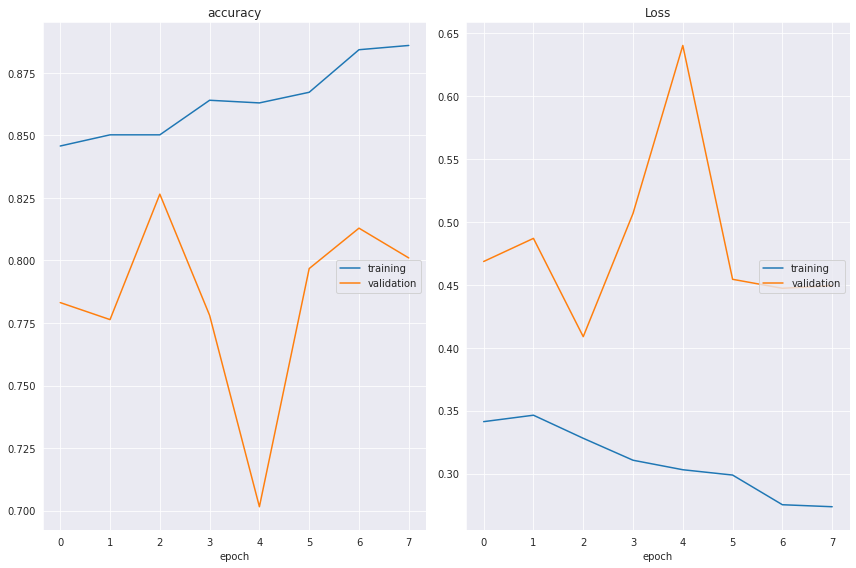

accuracy
	training         	 (min:    0.846, max:    0.886, cur:    0.886)
	validation       	 (min:    0.702, max:    0.827, cur:    0.801)
Loss
	training         	 (min:    0.274, max:    0.346, cur:    0.274)
	validation       	 (min:    0.409, max:    0.640, cur:    0.449)


In [ ]:
es_callback = EarlyStopping(monitor='val_loss', patience=5,mode='min')
callbacks = [PlotLossesKeras()]
model3.fit(word_seq_train,y_train,batch_size=128,epochs=150,callbacks=[callbacks,es_callback],validation_data=(word_seq_test,y_test))

In [ ]:
model3.save("rumor_text.h5")

In [ ]:
from google.colab import files
files.download('rumor_text.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model3.evaluate(word_seq_test,y_test)

37/37 [==============================] - 1s 22ms/step - loss: 0.4494 - accuracy: 0.8010


[0.44939592480659485, 0.8010203838348389]

In [ ]:
temp = np.concatenate((word_seq_train,word_seq_test),axis=0)
temp_y = np.concatenate((y_train,y_test),axis=0)

In [ ]:
model3.evaluate(temp,temp_y)

184/184 [==============================] - 4s 20ms/step - loss: 0.2223 - accuracy: 0.9137


[0.2222738116979599, 0.9137315154075623]

In [ ]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(text_df['clean_tweet'],text_df['target'],random_state=0,test_size=0.2,stratify=text_df['target'],shuffle=True)

In [ ]:
raw_docs_train_1 = X_train_1.tolist()
raw_docs_test_1 = X_test_1.tolist()

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(raw_docs_train_1+raw_docs_test_1)  #leaky
word_seq_train_1 = tokenizer.texts_to_sequences(raw_docs_train_1)
word_seq_test_1 = tokenizer.texts_to_sequences(raw_docs_test_1)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
word_seq_train_1 = sequence.pad_sequences(word_seq_train_1, maxlen=max_seq_len)
word_seq_test_1 = sequence.pad_sequences(word_seq_test_1, maxlen=max_seq_len)

dictionary size:  9081


In [ ]:
model3.evaluate(word_seq_test_1,y_test_1)

37/37 [==============================] - 1s 22ms/step - loss: 0.2323 - accuracy: 0.9116


[0.23229430615901947, 0.9115646481513977]

In [ ]:
temp_1 = np.concatenate((word_seq_train_1,word_seq_test_1),axis=0)
temp_y_1 = np.concatenate((y_train_1,y_test_1),axis=0)

In [ ]:
model3.evaluate(temp_1,temp_y_1)

184/184 [==============================] - 4s 20ms/step - loss: 0.2223 - accuracy: 0.9137


[0.22227375209331512, 0.9137315154075623]

In [ ]:
tokenizer_1 = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer_1.fit_on_texts(text_df['clean_tweet'])  #leaky
word_seq_train_1 = tokenizer_1.texts_to_sequences(raw_docs_train_1)
word_seq_test_1 = tokenizer_1.texts_to_sequences(raw_docs_test_1)
word_index = tokenizer_1.word_index
print("dictionary size: ", len(word_index))

#pad sequences
word_seq_train_1 = sequence.pad_sequences(word_seq_train_1, maxlen=max_seq_len)
word_seq_test_1 = sequence.pad_sequences(word_seq_test_1, maxlen=max_seq_len)

dictionary size:  9081


In [ ]:
model3.evaluate(word_seq_test_1,y_test_1)

37/37 [==============================] - 1s 22ms/step - loss: 0.7341 - accuracy: 0.6973


[0.7341145873069763, 0.6972789168357849]